# Hyperparameter Tuning for Sentiment Analysis with Random Forest

This notebook demonstrates hyperparameter optimization for a Random Forest Classifier model to perform sentiment analysis. We'll track experiments with MLflow and find the best model configuration.

## Setup and Imports

In [1]:
import numpy as np
import mlflow
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('..')
from src.models.train_models import ModelTrainer
from src.models.predict_models import ModelPredictor
from src.config import *

## Define Hyperparameter Grid

We'll create a grid of hyperparameters to search through:

- **n_estimators**: Number of trees in the forest
- **max_depth**: Maximum depth of the trees
- **min_samples_split**: Minimum number of samples required to split a node

In [2]:
# Define hyperparameter grids to search
n_estimators_values = [50, 100, 200]
max_depth_values = [None, 10, 20]
min_samples_split_values = [2, 5, 10]

## Hyperparameter Grid Search

Now we'll run through all combinations of hyperparameters and track the results using MLflow.

In [3]:
results = []

# Limit the number of combinations to avoid excessive training time
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            print(f"Training with n_estimators={n_estimators}, max_depth={max_depth}, min_samples_split={min_samples_split}")
            try:
                run_id = ModelTrainer.random_forest(
                    n_estimators=n_estimators, 
                    max_depth=max_depth, 
                    min_samples_split=min_samples_split
                )

                with mlflow.start_run(run_id=run_id):
                    run = mlflow.get_run(run_id)
                    metrics = run.data.metrics
                    params = run.data.params

                    results.append({
                        'run_id': run_id,
                        'n_estimators': params.get('n_estimators'),
                        'max_depth': params.get('max_depth'),
                        'min_samples_split': params.get('min_samples_split'),
                        'train_accuracy': metrics.get('train_accuracy'),
                        'test_accuracy': metrics.get('test_accuracy'),
                        'test_precision': metrics.get('test_precision'),
                        'test_recall': metrics.get('test_recall'),
                        'test_f1': metrics.get('test_f1'),
                    })
            except Exception as e:
                print(f"Error training with n_estimators={n_estimators}, max_depth={max_depth}, min_samples_split={min_samples_split}: {e}")
                continue

Training with n_estimators=50, max_depth=None, min_samples_split=2
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


e:\HCMUT-year 3 project\ml-course-shibainu-1\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Training with n_estimators=50, max_depth=None, min_samples_split=5
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=50, max_depth=None, min_samples_split=10
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=50, max_depth=10, min_samples_split=2
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=50, max_depth=10, min_samples_split=5
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=50, max_depth=10, min_samples_split=10
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=50, max_depth=20, min_samples_split=2
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=50, max_depth=20, min_samples_split=5
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=50, max_depth=20, min_samples_split=10
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=100, max_depth=None, min_samples_split=2
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=100, max_depth=None, min_samples_split=5
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=100, max_depth=None, min_samples_split=10
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=100, max_depth=10, min_samples_split=2
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=100, max_depth=10, min_samples_split=5
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=100, max_depth=10, min_samples_split=10
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=100, max_depth=20, min_samples_split=2
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=100, max_depth=20, min_samples_split=5
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=100, max_depth=20, min_samples_split=10
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=200, max_depth=None, min_samples_split=2
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=200, max_depth=None, min_samples_split=5
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=200, max_depth=None, min_samples_split=10
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=200, max_depth=10, min_samples_split=2
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=200, max_depth=10, min_samples_split=5
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=200, max_depth=10, min_samples_split=10
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=200, max_depth=20, min_samples_split=2
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=200, max_depth=20, min_samples_split=5
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=200, max_depth=20, min_samples_split=10
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


## Print All Model Test Accuracies

Let's display the test accuracies for all models, sorted by performance.


All Models Test Accuracies (sorted):

n_estimators max_depth min_samples_split  test_accuracy
          50      None                 2       0.811128
          50      None                10       0.808383
          50      None                 5       0.808134
         100      None                10       0.806387
         100      None                 2       0.805639
         200      None                 5       0.805639
         100      None                 5       0.805389
         200      None                 2       0.804890
         200      None                10       0.803144
          50        20                 2       0.772705
         100        20                 5       0.771956
          50        20                 5       0.771707
         100        20                 2       0.771707
         200        20                 2       0.771457
         100        20                10       0.771208
         200        20                 5       0.770958
         

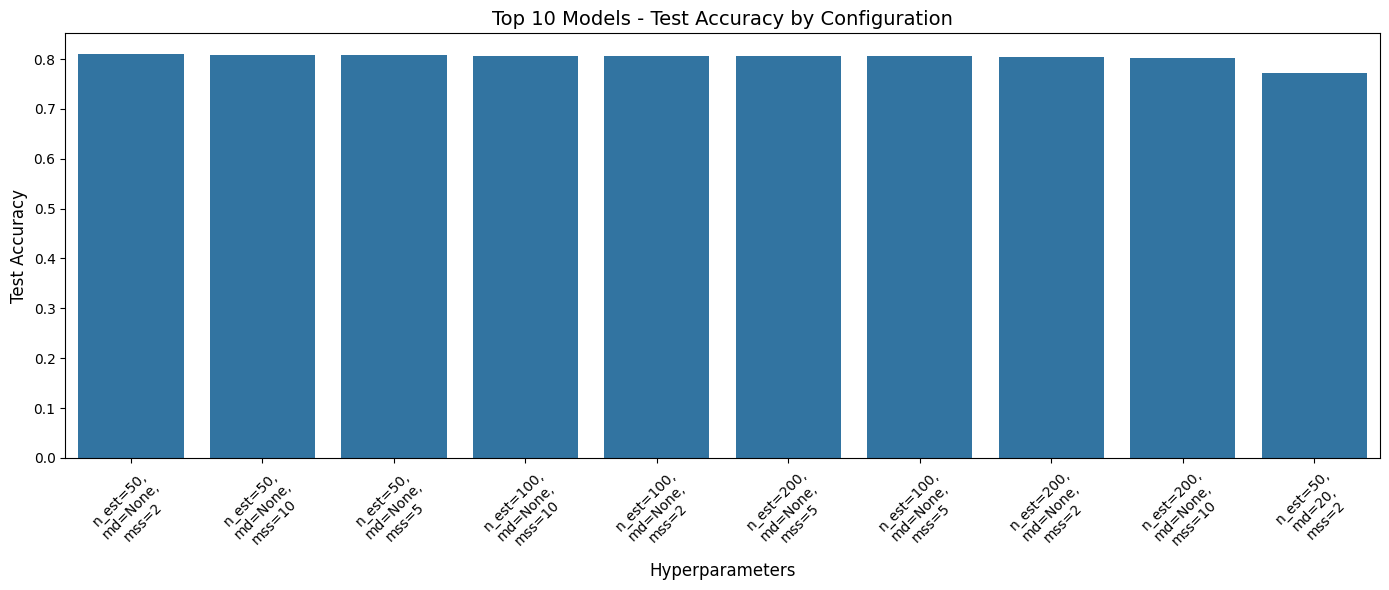

In [4]:
# Create dataframe from results
results_df = pd.DataFrame(results)

# Print all model test accuracies, sorted from best to worst
if not results_df.empty and 'test_accuracy' in results_df.columns:
    sorted_results = results_df.sort_values('test_accuracy', ascending=False)
    
    print("\nAll Models Test Accuracies (sorted):\n")
    print(sorted_results[['n_estimators', 'max_depth', 'min_samples_split', 'test_accuracy']].to_string(index=False))
    
    # Create a combined label for each configuration
    sorted_results['config'] = sorted_results.apply(
        lambda row: f"n_est={row['n_estimators']},\nmd={row['max_depth']},\nmss={row['min_samples_split']}", axis=1)
    
    # Plot with the combined label - take top 10 to avoid cluttering
    plt.figure(figsize=(14, 6))
    sns.barplot(x='config', y='test_accuracy', data=sorted_results.head(10))
    plt.title('Top 10 Models - Test Accuracy by Configuration', fontsize=14)
    plt.xlabel('Hyperparameters', fontsize=12)
    plt.ylabel('Test Accuracy', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo successful model runs found with test_accuracy metric.")

## Analyzing Results and Finding the Best Model


Best model:
n_estimators: 50, max_depth: None, min_samples_split: 2
Test Accuracy: 0.8111
Test Precision: 0.8391
Test Recall: 0.8111
Test F1: 0.7577
Run ID: 16b4597e6d5543089b73824ebda9d9ad


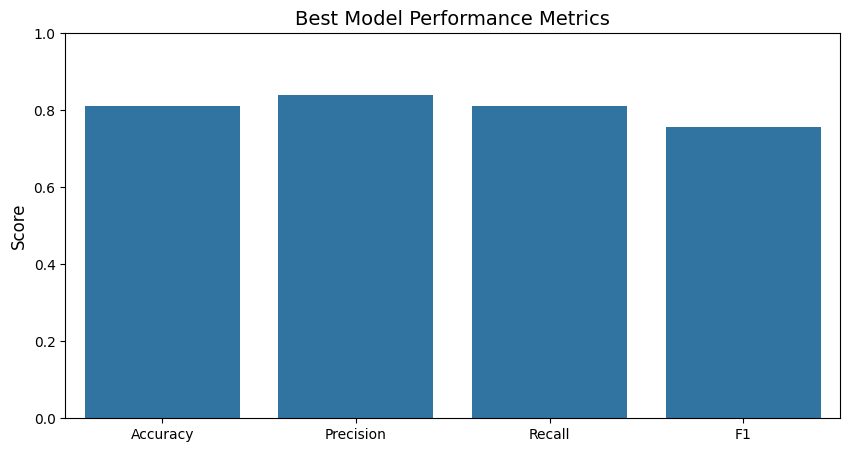

In [5]:
# Find the best model
if not results_df.empty and 'test_accuracy' in results_df.columns:
    best_model = results_df.loc[results_df['test_accuracy'].idxmax()]
    best_run_id = best_model['run_id']
    
    print("\nBest model:")
    print(f"n_estimators: {best_model['n_estimators']}, max_depth: {best_model['max_depth']}, min_samples_split: {best_model['min_samples_split']}")
    print(f"Test Accuracy: {best_model['test_accuracy']:.4f}")
    print(f"Test Precision: {best_model['test_precision']:.4f}")
    print(f"Test Recall: {best_model['test_recall']:.4f}")
    print(f"Test F1: {best_model['test_f1']:.4f}")
    print(f"Run ID: {best_run_id}")
    
    # Visualize metrics for the best model
    metrics = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']
    metric_values = [best_model[metric] for metric in metrics]
    metric_names = ['Accuracy', 'Precision', 'Recall', 'F1']
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=metric_names, y=metric_values)
    plt.title('Best Model Performance Metrics', fontsize=14)
    plt.ylabel('Score', fontsize=12)
    plt.ylim(0, 1)  # Metrics are between 0 and 1
    plt.show()
else:
    print("\nNo successful model runs found with test_accuracy metric.")
    best_run_id = None

## Making Predictions with the Best Model

In [6]:
if best_run_id is not None:
    # Prediction with the best model found
    texts = np.array(["This product works great!", 
                     "Terrible experience...",
                     "It's just okay, nothing special but does the job"])
    predictions = ModelPredictor.predict(best_run_id, texts)

    print(f"\nPredictions with Best Model (Run ID: {best_run_id[:8]}...):\n")
    for text, pred in zip(texts, predictions):
        sentiment = "Positive" if pred == 1 else "Negative"
        print(f"'{text}' -> {sentiment}")


Predictions with Best Model (Run ID: 16b4597e...):

'This product works great!' -> Positive
'Terrible experience...' -> Positive
'It's just okay, nothing special but does the job' -> Positive


## Model Analysis - Feature Importance

Let's examine the feature importance from our Random Forest model.


Top 20 Most Important Features:
         Feature  Importance
0            not    0.017517
1          great    0.007832
2            but    0.007137
3            and    0.006507
4            the    0.006181
5            was    0.005775
6            bad    0.005226
7   disappointed    0.005016
8             ok    0.004584
9          would    0.004419
10            it    0.004249
11          love    0.004241
12            is    0.004205
13            be    0.004157
14            to    0.004149
15            of    0.004116
16            my    0.004079
17          this    0.003901
18           for    0.003768
19          best    0.003757


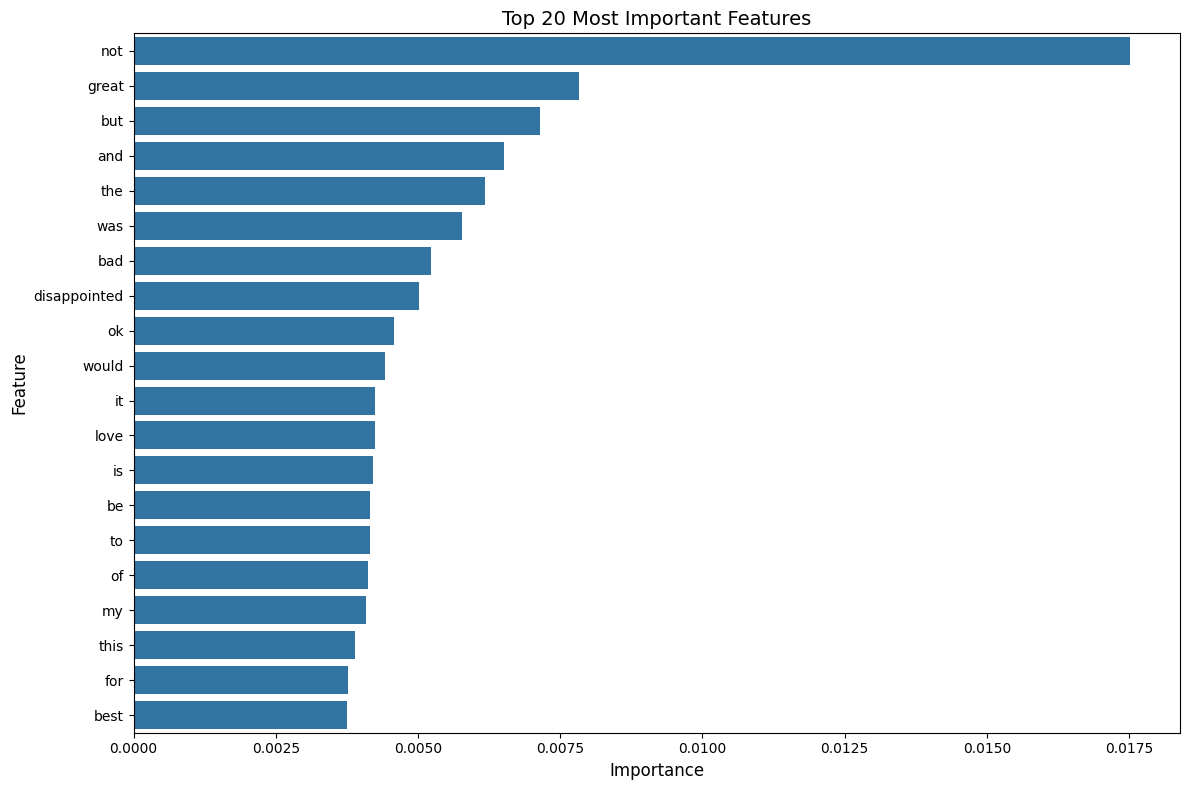

In [7]:
if best_run_id is not None:
    # Load the model
    model = mlflow.sklearn.load_model(f"runs:/{best_run_id}/model")
    
    # Extract the feature importance
    vectorizer = model.named_steps['vectorizer']
    classifier = model.named_steps['classifier']
    
    # Get feature names
    feature_names = vectorizer.get_feature_names_out()
    
    # Get feature importance
    importances = classifier.feature_importances_
    
    # Create DataFrame with feature names and importance
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    
    # Sort by importance
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)
    
    # Display top 20 features
    print("\nTop 20 Most Important Features:")
    print(feature_importance_df.head(20))
    
    # Plot top 20 features
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
    plt.title('Top 20 Most Important Features', fontsize=14)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    plt.show()

## Testing with Custom Reviews

In [8]:
# Define custom reviews
custom_reviews = np.array([
    "This product is amazing! I would definitely recommend it to everyone.",
    "The quality is very poor and it broke after just one use. Don't waste your money.",
    "It's an okay product, not great but not terrible either.",
    "I'm really impressed with how well this works. Exceeds expectations!",
    "Worst purchase ever. Complete waste of money and time."
])

if best_run_id is not None:
    # Make predictions
    predictions = ModelPredictor.predict(best_run_id, custom_reviews)
    
    # Display results
    print("Custom Review Predictions:")
    for i, (review, pred) in enumerate(zip(custom_reviews, predictions)):
        sentiment = "Positive" if pred == 1 else "Negative"
        print(f"\nReview {i+1}:")
        print(f"Text: {review}")
        print(f"Predicted Sentiment: {sentiment}")

Custom Review Predictions:

Review 1:
Text: This product is amazing! I would definitely recommend it to everyone.
Predicted Sentiment: Positive

Review 2:
Text: The quality is very poor and it broke after just one use. Don't waste your money.
Predicted Sentiment: Positive

Review 3:
Text: It's an okay product, not great but not terrible either.
Predicted Sentiment: Positive

Review 4:
Text: I'm really impressed with how well this works. Exceeds expectations!
Predicted Sentiment: Positive

Review 5:
Text: Worst purchase ever. Complete waste of money and time.
Predicted Sentiment: Negative
